https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

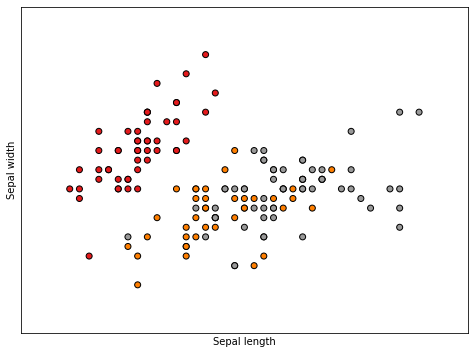

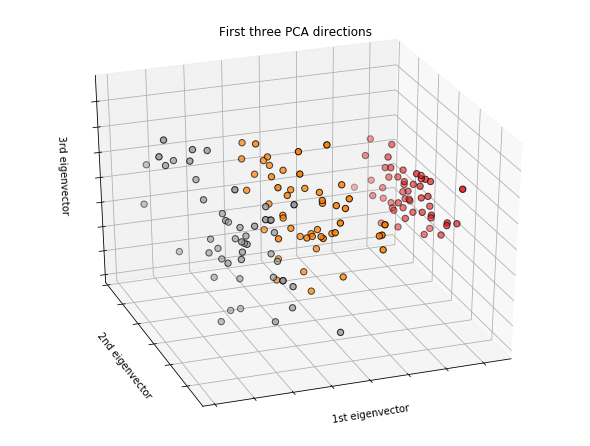

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [5]:
import pandas as pd
df1 = pd.read_csv('/home/jovyan/stock_ori.csv')
df2 = pd.read_csv('/home/jovyan/stock_pca.csv')[['PC1', 'PC2', 'PC3', 'y', 'k-mean']]
df2

,PC1,PC2,PC3,y,k-mean
0,1.656351e+10,1.242859e+10,-4.889063e+09,ASIA AVIATION,0
1,2.556986e+11,1.920495e+11,-7.568443e+10,ADVANCED INFO SER.,1
2,1.575591e+10,1.183507e+10,-4.664924e+09,AE.THANA SINSAP (THAI.),0
3,8.888195e+09,6.675405e+09,-2.630463e+09,AMATA,0
4,8.753176e+09,6.573393e+09,-2.589827e+09,ANANDA DEVELOPMENT,0
...,...,...,...,...,...
137,1.658459e+10,1.245543e+10,-4.907920e+09,VGI,0
138,1.582015e+10,1.186291e+10,-4.660803e+09,VIBHAVADI MEDICAL,0
139,1.388823e+10,1.043150e+10,-4.111212e+09,VANACHAI GROUP,0
140,2.576899e+10,1.934436e+10,-7.616037e+09,WHA,0


In [6]:
df1

,Unnamed: 0,stock,date,vol_st,mv_st,MV,VO,MACD,P_SMA_5,VO_SMA_20
0,0,ASIA AVIATION,2016-01-05,0.087430,0.069858,2.521999e+10,39276900.0,0.14,5.220,17876495.0
1,1,ADVANCED INFO SER.,2016-01-05,1.533381,-0.208911,3.894753e+11,59688900.0,-17.06,146.000,25247980.0
2,2,AE.THANA SINSAP (THAI.),2016-01-05,-0.323276,0.005801,2.400000e+10,175900.0,-0.03,96.300,39520.0
3,3,AMATA,2016-01-05,-0.583901,-0.019518,1.353809e+10,2669500.0,-0.27,12.120,1661715.0
4,4,ANANDA DEVELOPMENT,2016-01-05,-0.595536,0.049638,1.333198e+10,3437500.0,0.03,4.116,3411440.0
...,...,...,...,...,...,...,...,...,...,...
137,144,VGI,2016-01-05,-0.199999,-0.011072,2.526070e+10,3456500.0,-0.02,3.672,5764380.0
138,145,VIBHAVADI MEDICAL,2016-01-05,1.338088,0.118423,2.408218e+10,50856000.0,0.06,1.904,37467300.0
139,146,VANACHAI GROUP,2016-01-05,-0.708001,-0.044194,2.115459e+10,1374900.0,-0.22,13.980,1642120.0
140,147,WHA,2016-01-05,-0.258831,-0.081263,3.924321e+10,21043200.0,-0.04,2.832,30828755.0


In [10]:
# Merged data original with clustered results
df3 = df1.merge(df2, left_on='stock', right_on='y')
df3

,Unnamed: 0,stock,date,vol_st,mv_st,MV,VO,MACD,P_SMA_5,VO_SMA_20,PC1,PC2,PC3,y,k-mean
0,0,ASIA AVIATION,2016-01-05,0.087430,0.069858,2.521999e+10,39276900.0,0.14,5.220,17876495.0,1.656351e+10,1.242859e+10,-4.889063e+09,ASIA AVIATION,0
1,1,ADVANCED INFO SER.,2016-01-05,1.533381,-0.208911,3.894753e+11,59688900.0,-17.06,146.000,25247980.0,2.556986e+11,1.920495e+11,-7.568443e+10,ADVANCED INFO SER.,1
2,2,AE.THANA SINSAP (THAI.),2016-01-05,-0.323276,0.005801,2.400000e+10,175900.0,-0.03,96.300,39520.0,1.575591e+10,1.183507e+10,-4.664924e+09,AE.THANA SINSAP (THAI.),0
3,3,AMATA,2016-01-05,-0.583901,-0.019518,1.353809e+10,2669500.0,-0.27,12.120,1661715.0,8.888195e+09,6.675405e+09,-2.630463e+09,AMATA,0
4,4,ANANDA DEVELOPMENT,2016-01-05,-0.595536,0.049638,1.333198e+10,3437500.0,0.03,4.116,3411440.0,8.753176e+09,6.573393e+09,-2.589827e+09,ANANDA DEVELOPMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,144,VGI,2016-01-05,-0.199999,-0.011072,2.526070e+10,3456500.0,-0.02,3.672,5764380.0,1.658459e+10,1.245543e+10,-4.907920e+09,VGI,0
138,145,VIBHAVADI MEDICAL,2016-01-05,1.338088,0.118423,2.408218e+10,50856000.0,0.06,1.904,37467300.0,1.582015e+10,1.186291e+10,-4.660803e+09,VIBHAVADI MEDICAL,0
139,146,VANACHAI GROUP,2016-01-05,-0.708001,-0.044194,2.115459e+10,1374900.0,-0.22,13.980,1642120.0,1.388823e+10,1.043150e+10,-4.111212e+09,VANACHAI GROUP,0
140,147,WHA,2016-01-05,-0.258831,-0.081263,3.924321e+10,21043200.0,-0.04,2.832,30828755.0,2.576899e+10,1.934436e+10,-7.616037e+09,WHA,0


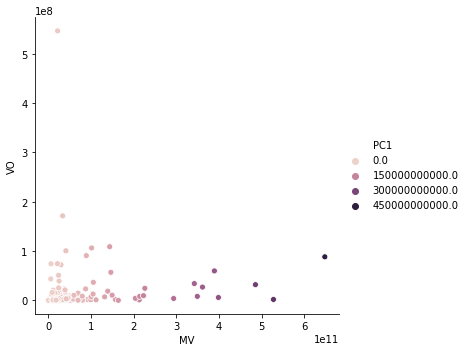

In [16]:
# Plot the training points
X = df3[['MV', 'VO']].values

import seaborn as sns
sns.relplot(x="MV", y="VO", hue="PC1", data=df3);

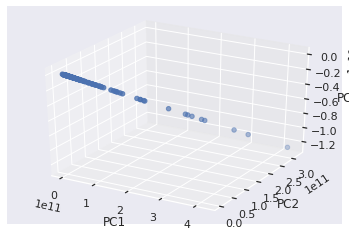

In [18]:
# Plotting a 3D Scatter Plot in Seaborn
#  https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples/

from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df3['PC1']
y = df3['PC2']
z = df3['PC3']

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.scatter(x, y, z)

plt.show()